# E- Commerce - Users of C2C Fashion Store




### Description
Explore user behaviour of a successful website to get benchmarks. Get actionable insights about online sales and clients


## Summary
##### Foreword
This users dataset is a preview of a much bigger dataset, with lots of related data (product listings of sellers, comments on listed products, etc...).


### Context
There are a lot of unknowns when running an E-commerce store, even when you have analytics to guide your decisions.
Users are an important factor in an e-commerce business.
This is especially true in a C2C-oriented store, since they are both the suppliers (by uploading their products) AND the customers (by purchasing other user's articles).


### Content
The data was scraped from a successful online C2C fashion store with over 9M registered users. The store was first launched in Europe around 2009 then expanded worldwide.


In [292]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy import stats
from sklearn.model_selection import train_test_split

In [294]:
import warnings
warnings.filterwarnings("ignore")

In [296]:
df = pd.read_csv("C:\\Users\\PRIYANKA P\\Documents\\DSML FINAL PROJECT\\E-commerce - Users of a C2C fashion store.csv")

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98913 entries, 0 to 98912
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   identifierHash       98913 non-null  int64  
 1   type                 98913 non-null  object 
 2   country              98913 non-null  object 
 3   language             98913 non-null  object 
 4   socialNbFollowers    98913 non-null  int64  
 5   socialNbFollows      98913 non-null  int64  
 6   socialProductsLiked  98913 non-null  int64  
 7   productsListed       98913 non-null  int64  
 8   productsSold         98913 non-null  int64  
 9   productsPassRate     98913 non-null  float64
 10  productsWished       98913 non-null  int64  
 11  productsBought       98913 non-null  int64  
 12  gender               98913 non-null  object 
 13  civilityGenderId     98913 non-null  int64  
 14  civilityTitle        98913 non-null  object 
 15  hasAnyApp            98913 non-null 

In [145]:
df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,1920794532,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,1920663460,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us


In [147]:
df.describe()

,identifierHash,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,civilityGenderId,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears
count,9.891300e+04,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000,98913.000000
mean,1.902340e+09,3.432269,8.425677,4.420743,0.093304,0.121592,0.812303,1.562595,0.171929,1.773993,581.291236,3063.771870,102.125583,8.510424
std,1.285837e+09,3.882383,52.839572,181.030569,2.050144,2.126895,8.500205,25.192793,2.332266,0.428679,208.855888,168.298621,5.609735,0.467863
min,6.544300e+04,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,2852.000000,95.070000,7.920000
25%,8.190688e+08,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,572.000000,2857.000000,95.230000,7.940000
50%,1.638924e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,694.000000,3196.000000,106.530000,8.880000
75%,2.996175e+09,3.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,702.000000,3201.000000,106.700000,8.890000
max,4.294967e+09,744.000000,13764.000000,51671.000000,244.000000,174.000000,100.000000,2635.000000,405.000000,3.000000,709.000000,3205.000000,106.830000,8.900000


In [13]:
df

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,user,Royaume-Uni,en,147,10,77,26,174,74.0,...,mr,True,False,True,True,11,3196,106.53,8.88,gb
1,1920925604,user,Monaco,en,167,8,2,19,170,99.0,...,mrs,True,False,True,True,12,3204,106.80,8.90,mc
2,1920860068,user,France,fr,137,13,60,33,163,94.0,...,mrs,True,False,True,False,11,3203,106.77,8.90,fr
3,1920794532,user,Etats-Unis,en,131,10,14,122,152,92.0,...,mrs,True,False,True,False,12,3198,106.60,8.88,us
4,1920663460,user,Etats-Unis,en,167,8,0,25,125,100.0,...,mrs,False,False,False,True,22,2854,95.13,7.93,us
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98908,3957653410,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.80,8.90,us
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.80,8.90,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.80,8.90,be
98911,3957456802,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.80,8.90,it


In [15]:
print(df.describe())

       identifierHash  socialNbFollowers  socialNbFollows  \
count    9.891300e+04       98913.000000     98913.000000   
mean     1.902340e+09           3.432269         8.425677   
std      1.285837e+09           3.882383        52.839572   
min      6.544300e+04           3.000000         0.000000   
25%      8.190688e+08           3.000000         8.000000   
50%      1.638924e+09           3.000000         8.000000   
75%      2.996175e+09           3.000000         8.000000   
max      4.294967e+09         744.000000     13764.000000   

       socialProductsLiked  productsListed  productsSold  productsPassRate  \
count         98913.000000    98913.000000  98913.000000      98913.000000   
mean              4.420743        0.093304      0.121592          0.812303   
std             181.030569        2.050144      2.126895          8.500205   
min               0.000000        0.000000      0.000000          0.000000   
25%               0.000000        0.000000      0.000000    

In [17]:
df.isnull().sum()

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64

In [21]:
df.duplicated().sum()

0

In [19]:
null_counts = df.isnull().sum()
print(null_counts)

identifierHash         0
type                   0
country                0
language               0
socialNbFollowers      0
socialNbFollows        0
socialProductsLiked    0
productsListed         0
productsSold           0
productsPassRate       0
productsWished         0
productsBought         0
gender                 0
civilityGenderId       0
civilityTitle          0
hasAnyApp              0
hasAndroidApp          0
hasIosApp              0
hasProfilePicture      0
daysSinceLastLogin     0
seniority              0
seniorityAsMonths      0
seniorityAsYears       0
countryCode            0
dtype: int64


In [23]:
df.tail()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
98908,3957653410,user,Etats-Unis,fr,3,8,0,0,0,0.0,...,mr,False,False,False,True,708,3204,106.8,8.9,us
98909,3957587874,user,France,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,695,3204,106.8,8.9,fr
98910,3957522338,user,Belgique,en,3,8,0,0,0,0.0,...,mr,True,True,False,True,520,3204,106.8,8.9,be
98911,3957456802,user,Italie,it,3,8,0,0,0,0.0,...,mrs,False,False,False,True,267,3204,106.8,8.9,it
98912,3957391266,user,Guinée,fr,3,8,0,0,0,0.0,...,mr,True,False,True,True,561,3204,106.8,8.9,gn


In [149]:
df.columns

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')

In [151]:
for column in df.columns:
    if df[column].dtype == "object":
        print(column)

type
country
language
gender
civilityTitle
countryCode


In [153]:
df_col = df.select_dtypes(include=["object"])
for column in df_col.columns:
    unique_count = df_col[column].nunique()
    print(f"{column} : {df[column].nunique()}")

type : 1
country : 200
language : 5
gender : 2
civilityTitle : 3
countryCode : 199


In [155]:
label_encoder = LabelEncoder()
df["type"] = label_encoder.fit_transform(df["type"])
df["country"] = label_encoder.fit_transform(df["country"])
df["language"] = label_encoder.fit_transform(df["language"])
df["gender"] = label_encoder.fit_transform(df["gender"])
df["civilityTitle"] = label_encoder.fit_transform(df["civilityTitle"])
df["countryCode"] = label_encoder.fit_transform(df["countryCode"])

df.head()

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,...,civilityTitle,hasAnyApp,hasAndroidApp,hasIosApp,hasProfilePicture,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
0,1920991140,0,145,1,147,10,77,26,174,74.0,...,1,True,False,True,True,11,3196,106.53,8.88,66
1,1920925604,0,119,1,167,8,2,19,170,99.0,...,2,True,False,True,True,12,3204,106.80,8.90,119
2,1920860068,0,58,3,137,13,60,33,163,94.0,...,2,True,False,True,False,11,3203,106.77,8.90,64
3,1920794532,0,55,1,131,10,14,122,152,92.0,...,2,True,False,True,False,12,3198,106.60,8.88,185
4,1920663460,0,55,1,167,8,0,25,125,100.0,...,2,False,False,False,True,22,2854,95.13,7.93,185


In [157]:
df.describe().round(2)

,identifierHash,type,country,language,socialNbFollowers,socialNbFollows,socialProductsLiked,productsListed,productsSold,productsPassRate,productsWished,productsBought,gender,civilityGenderId,civilityTitle,daysSinceLastLogin,seniority,seniorityAsMonths,seniorityAsYears,countryCode
count,9.891300e+04,98913.0,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00,98913.00
mean,1.902340e+09,0.0,70.82,1.76,3.43,8.43,4.42,0.09,0.12,0.81,1.56,0.17,0.23,1.77,1.76,581.29,3063.77,102.13,8.51,93.71
std,1.285837e+09,0.0,42.52,1.15,3.88,52.84,181.03,2.05,2.13,8.50,25.19,2.33,0.42,0.43,0.44,208.86,168.30,5.61,0.47,55.17
min,6.544300e+04,0.0,0.00,0.00,3.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,11.00,2852.00,95.07,7.92,0.00
25%,8.190688e+08,0.0,55.00,1.00,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,572.00,2857.00,95.23,7.94,64.00
50%,1.638924e+09,0.0,58.00,1.00,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,694.00,3196.00,106.53,8.88,66.00
75%,2.996175e+09,0.0,87.00,3.00,3.00,8.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,2.00,702.00,3201.00,106.70,8.89,152.00
max,4.294967e+09,0.0,199.00,4.00,744.00,13764.00,51671.00,244.00,174.00,100.00,2635.00,405.00,1.00,3.00,2.00,709.00,3205.00,106.83,8.90,198.00


In [159]:
scaler = StandardScaler()
numeric_cols = ['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

In [165]:
print(df.columns)
df.columns = df.columns.str.strip()
X = df.drop("productsBought", axis=1) 
y = df["productsBought"]
df = pd.get_dummies(df, drop_first=True, columns=[col for col in df.columns if col != "productsBought"])

Index(['identifierHash', 'type', 'country', 'language', 'socialNbFollowers',
       'socialNbFollows', 'socialProductsLiked', 'productsListed',
       'productsSold', 'productsPassRate', 'productsWished', 'productsBought',
       'gender', 'civilityGenderId', 'civilityTitle', 'hasAnyApp',
       'hasAndroidApp', 'hasIosApp', 'hasProfilePicture', 'daysSinceLastLogin',
       'seniority', 'seniorityAsMonths', 'seniorityAsYears', 'countryCode'],
      dtype='object')


In [161]:
df.head()
df.dtypes
object_columns = df.select_dtypes(include="object").columns
print(object_columns)

if len(object_columns) > 0:
    df.describe(include="object")

else:
    print("No object columns found in the dataset.")

Index([], dtype='object')
No object columns found in the dataset.


In [163]:
df_no = df.select_dtypes(include=[np.number])
Q1 = df_no.quantile(0.25)
Q3 = df_no.quantile(0.75)
IQR = Q3 - Q1
df= df[~((df_no < (Q1 - 1.5 *IQR)) | (df_no > (Q3 + 1.5 * IQR))).any(axis=1)]

In [188]:
print("Outliers :")
print(df)

Outliers :
       productsBought  identifierHash_130979  identifierHash_262052  \
14254       -0.073718                  False                  False   
14261       -0.073718                  False                  False   
14262       -0.073718                  False                  False   
14264       -0.073718                  False                  False   
14265       -0.073718                  False                  False   
...               ...                    ...                    ...   
98899       -0.073718                  False                  False   
98900       -0.073718                  False                  False   
98902       -0.073718                  False                  False   
98906       -0.073718                  False                  False   
98907       -0.073718                  False                  False   

       identifierHash_589731  identifierHash_720804  identifierHash_851875  \
14254                  False                  False       

In [196]:
df_no_outliers = df[~((df_no >= (Q1 - 1.5 *IQR)) & (df_no <= (Q3 + 1.5 * IQR))).any(axis=1)]

print(f"Original DataFrame shape: {df.shape}")
print(f"DataFrame shape after removing outliers: {df_no_outliers.shape}")

Original DataFrame shape: (37292, 37908)
DataFrame shape after removing outliers: (0, 37908)


In [198]:
outliers_count = df
outliers_count = df.shape[0] - df_no_outliers.shape[0]
print(f"Number of outliers removed: {outliers_count}")

Number of outliers removed: 37292


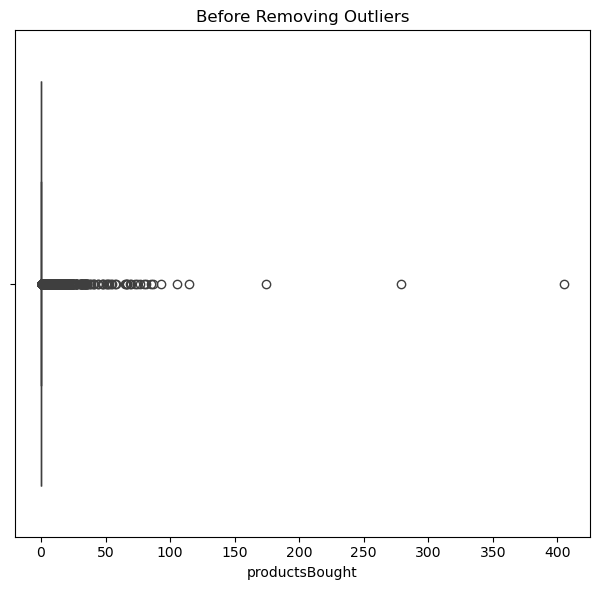

In [232]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df, x="productsBought")
plt.title("Before Removing Outliers")

plt.tight_layout()
plt.show()

In [200]:
PurchaseCounts = df["productsBought"]. value_counts()
PurchaseCounts.reset_index()

,productsBought,count
0,-0.073718,37292


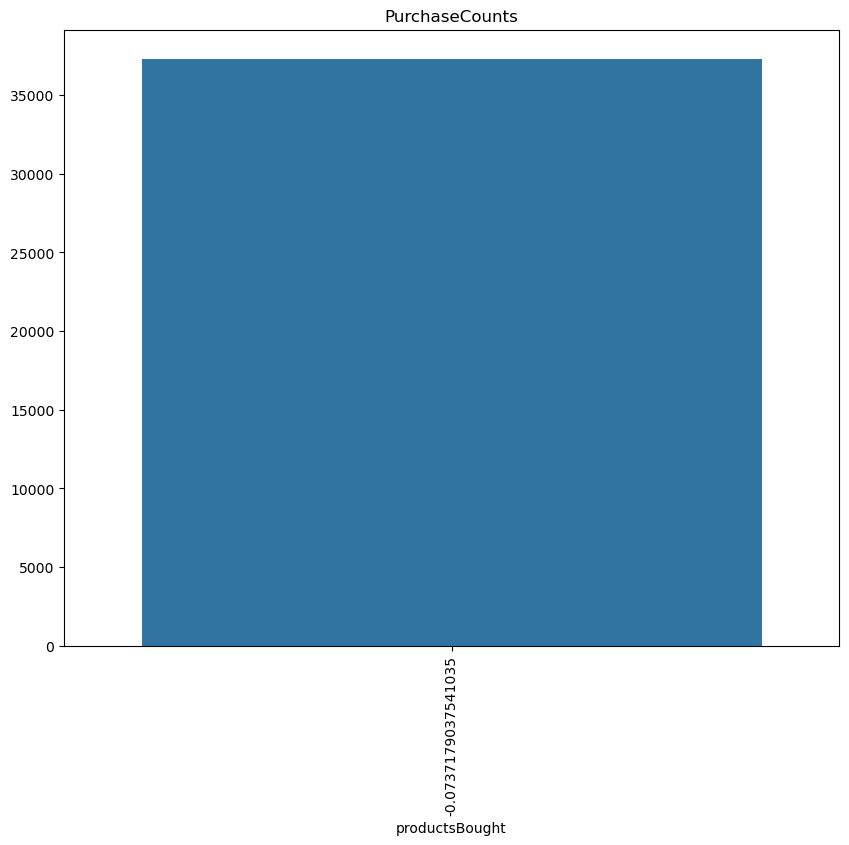

In [182]:
plt.figure(figsize = (10,8))
sns.barplot(x=PurchaseCounts.index, y=PurchaseCounts.values)
plt.title("PurchaseCounts")
plt.xticks(rotation=90)
plt.show()

In [262]:
X = df.drop("productsBought", axis=1)  # Features
y = df["productsBought"]                # Target variable



# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Test set shape:", X_test.shape, y_test.shape)

Training set shape: (79130, 23) (79130,)
Test set shape: (19783, 23) (19783,)


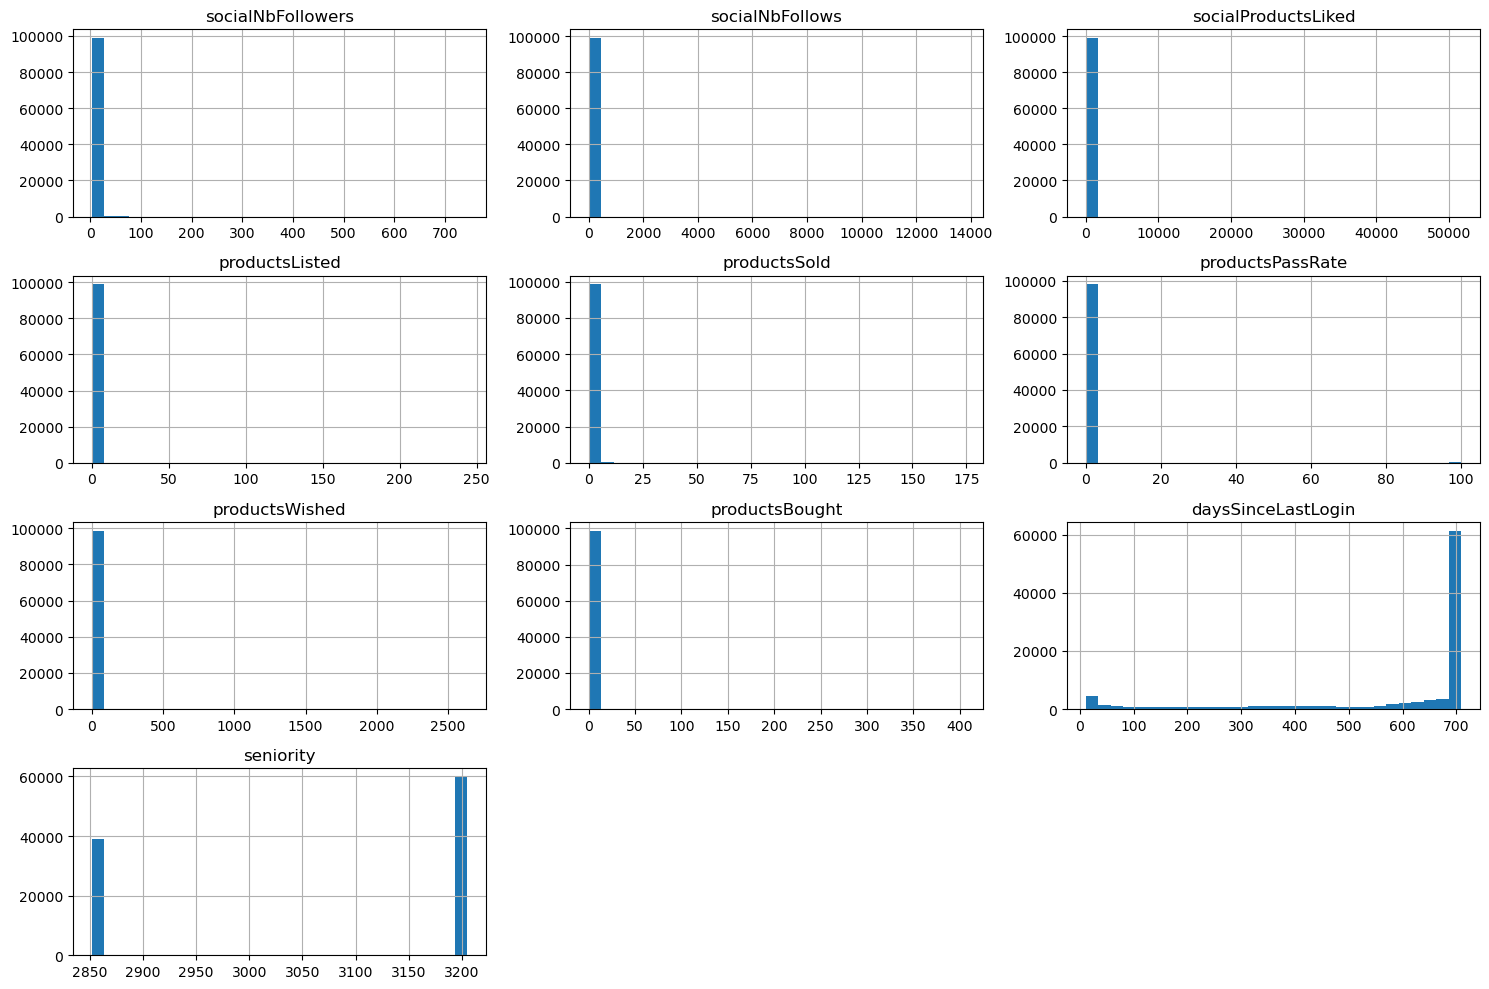

In [268]:
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

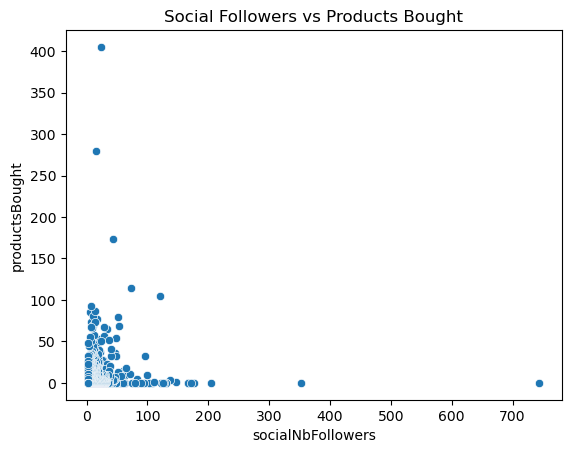

In [272]:
sns.scatterplot(x='socialNbFollowers', y='productsBought', data=df)
plt.title("Social Followers vs Products Bought")
plt.show()

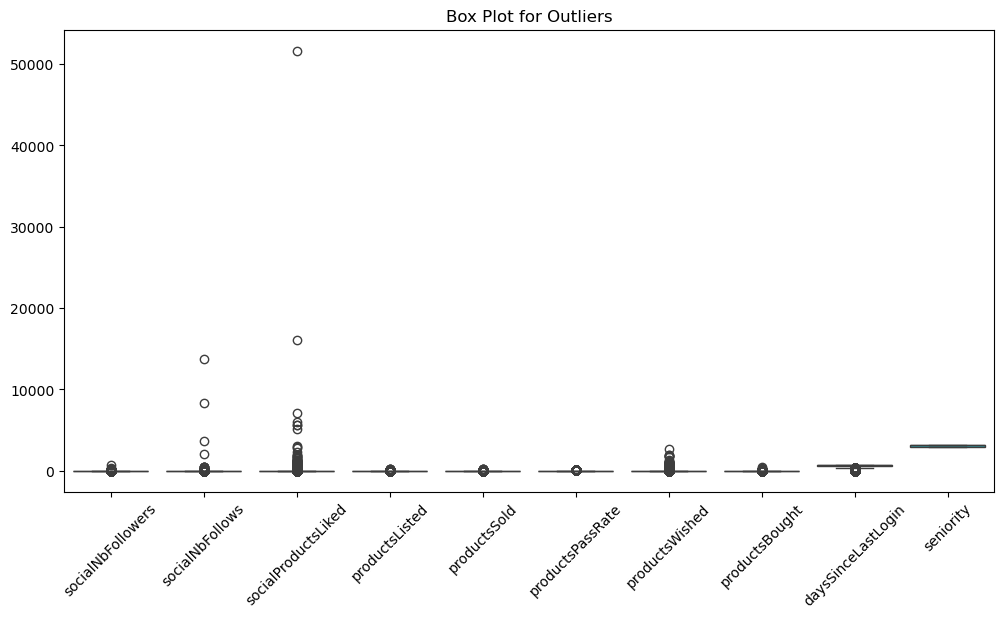

In [308]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_cols])
plt.title("Box Plot for Outliers")
plt.xticks(rotation=45)
plt.show()

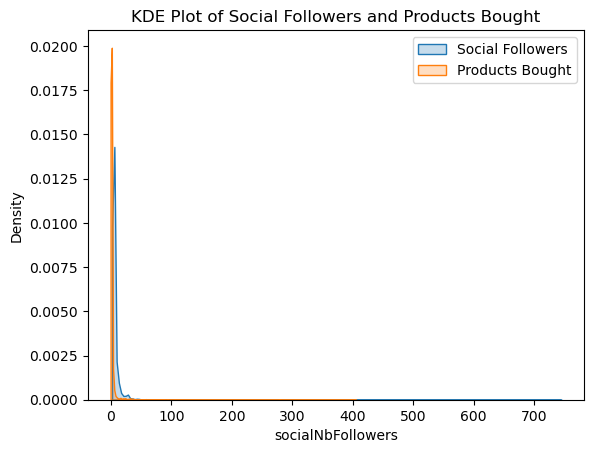

In [312]:
sns.kdeplot(df['socialNbFollowers'], shade=True, label='Social Followers')
sns.kdeplot(df['productsBought'], shade=True, label='Products Bought')
plt.legend()
plt.title("KDE Plot of Social Followers and Products Bought")
plt.show()

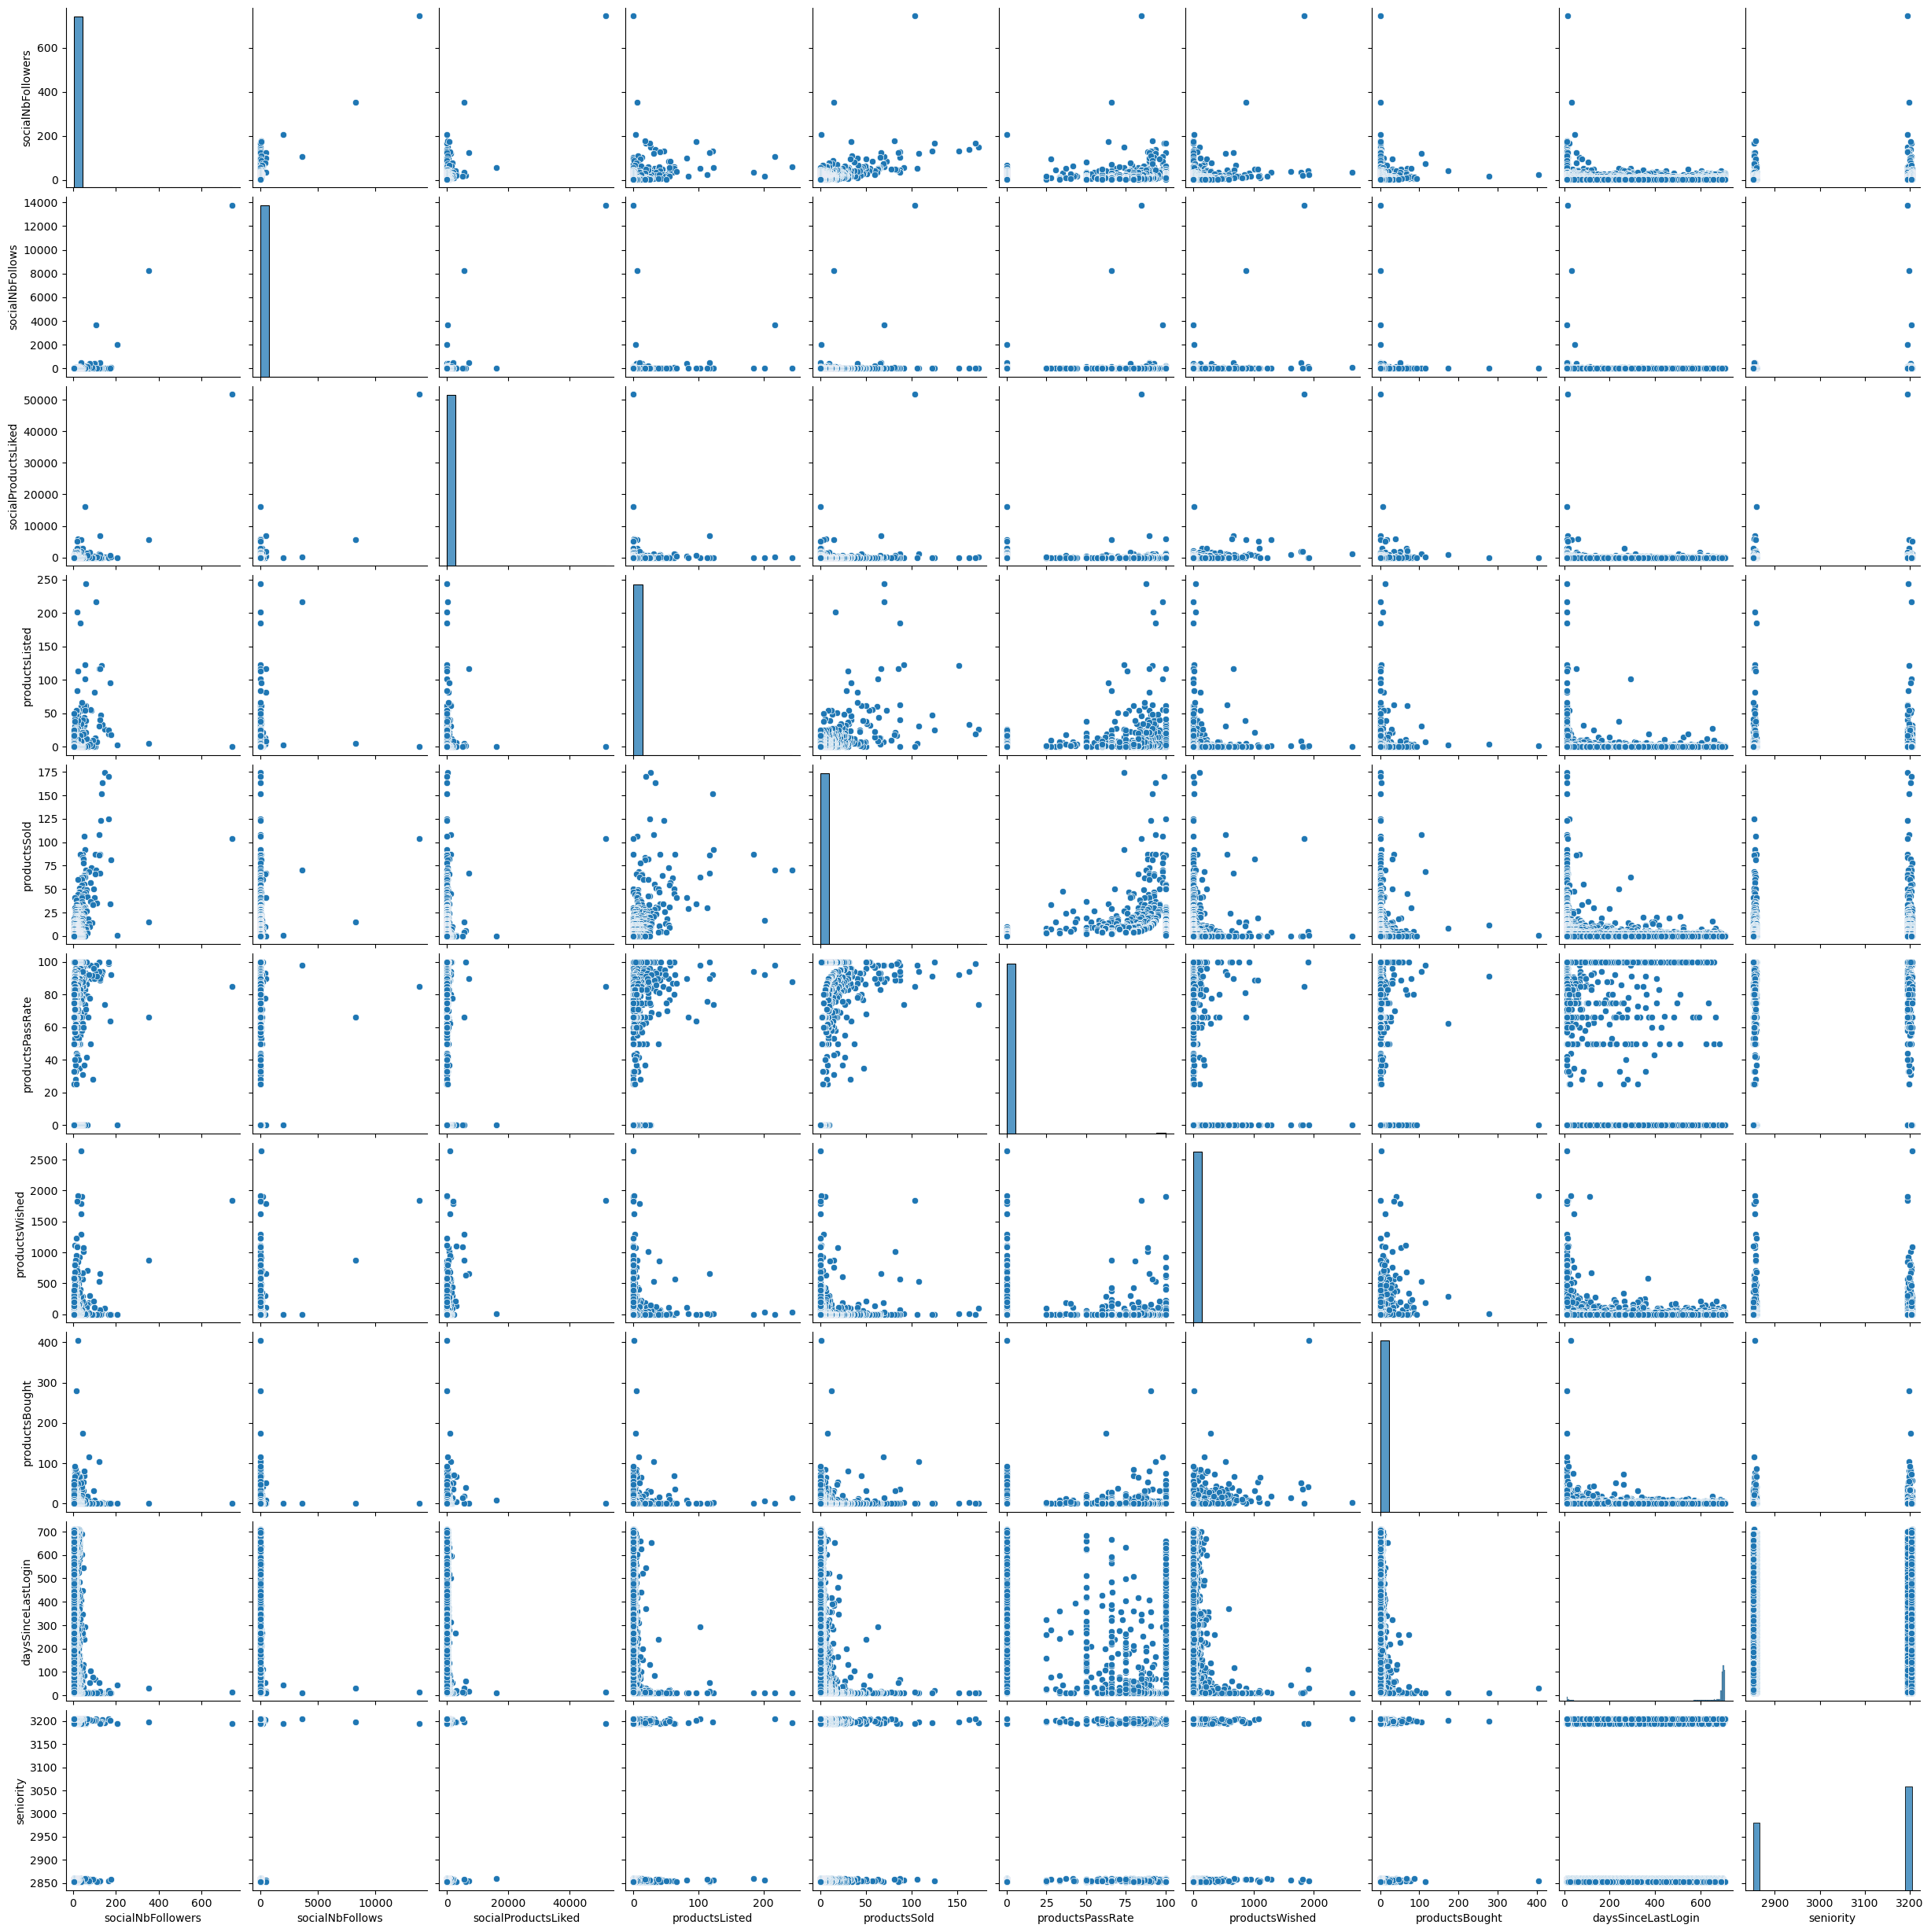

In [316]:
sns.pairplot(df[['socialNbFollowers', 'socialNbFollows', 'socialProductsLiked', 'productsListed', 
                'productsSold', 'productsPassRate', 'productsWished', 'productsBought', 
                'daysSinceLastLogin', 'seniority']])